<a href="https://colab.research.google.com/github/BirkJefta/Colab/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ensure that we use Python 3.7 or above:

In [4]:
import sys

assert sys.version_info >= (3, 7)

### Ensure that we use at least Scikit-Learn 1.0.1

In [5]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

### Let us set up the fonts in mathplotlib

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Import important libraries 'numpy' and 'pandas'

In [7]:
import numpy as np
import pandas as pd

# Make reference to life satifaction data file

In [8]:
datafile = "https://github.com/ageron/data/raw/main/lifesat/lifesat.csv"

##Try with this one later
##datafile = "https://raw.githubusercontent.com/jpandersen61/Machine-Learning/main/InjuredandkilledintrafikDK.csv"

### Excercise(s):

Try viewing this file in your internet browser

### Load the data file

In [9]:
lifesat = pd.read_csv(datafile)


### Excercise(s)

1. Make a new code cell below and evaluate 'lifesat'

2. Get some information about the kind of data structure, that life satisfaction data is store in. Usefuk to know when using the data afterwards in Python: Make a new code cell below and evaluate 'type(lifesat)'

### Extract the learning set 'X' and its labels 'y'

In [10]:
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values



### Exercises:

Make a new code cell below and evaluate 'X'





Make a new code cell below and evaluate 'y'

### Let us plot the life satisfaction data and introduce a model

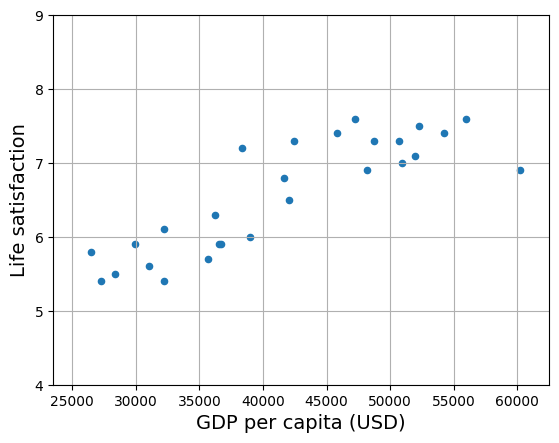

In [11]:
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

### Excercise(s):

Define various 't0' and 't1' (thetas) and observe how it affects our model

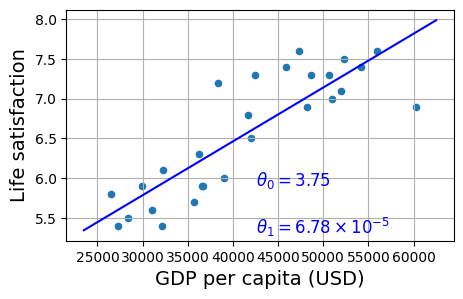

In [26]:
t0, t1 = 3.75, 6.78e-05

from sklearn import linear_model
min_gdp = 23_500
max_gdp = 62_500
min_life_sat = 4
max_life_sat = 9

lifesat.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x="GDP per capita (USD)", y="Life satisfaction")

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

#plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

### Establish the model

In [13]:
from sklearn import linear_model

X_features = lifesat[["GDP per capita (USD)"]]
y_labels = lifesat[["Life satisfaction"]]

lin1 = linear_model.LinearRegression()
lin1.fit(X_features, y_labels)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


In [14]:
X_pred = 40000
y_pred = lin1.predict([[X_pred]])[0,0]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
y_pred

np.float64(6.4606093051133975)

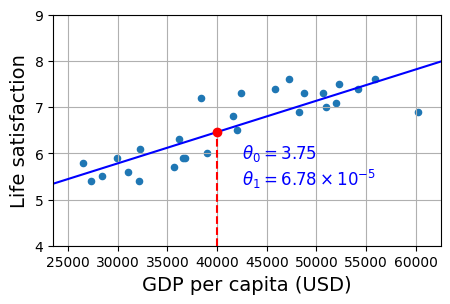

In [16]:
from sklearn import linear_model
min_gdp = 23_500
max_gdp = 62_500
min_life_sat = 4
max_life_sat = 9

lifesat.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x="GDP per capita (USD)", y="Life satisfaction")

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.plot([X_pred, X_pred],
         [min_life_sat, y_pred], "r--")
plt.plot(X_pred, y_pred, "ro")

plt.show()

### Excercise(s):


1. Try with another dataset https://raw.githubusercontent.com/jpandersen61/Machine-Learning/main/InjuredandkilledintrafikDK.csv

In [29]:
datafile2 = "https://raw.githubusercontent.com/jpandersen61/Machine-Learning/main/InjuredandkilledintrafikDK.csv"

In [30]:
injuredorkilled = pd.read_csv(datafile2)

In [31]:
injuredorkilled

,year,quantity
0,2001,8896
1,2002,9254
2,2003,8844
3,2004,7915
4,2005,6919
5,2006,6821
6,2007,7062
7,2008,6329
8,2009,5250
9,2010,4408


In [32]:
X_year = injuredorkilled[['year']].values
y_year = injuredorkilled[['quantity']].values

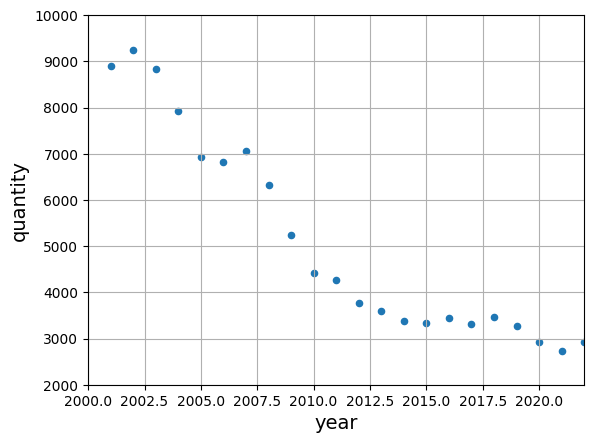

In [33]:
injuredorkilled.plot(kind='scatter', grid=True,
             x="year", y="quantity")
plt.axis([2000,2022,2000,10000])
plt.show()

In [35]:
from sklearn import linear_model

X_injured_features = injuredorkilled[["year"]]
y_killed_labels = injuredorkilled[["quantity"]]

lin2 = linear_model.LinearRegression()
lin2.fit(X_injured_features, y_killed_labels)

t_i_0, t_i_1 = lin2.intercept_[0], lin2.coef_[0][0]
print(f"θ0={t_i_0}, θ1={t_i_1}")

θ0=651608.682100508, θ1=-321.4088085827215


In [59]:
X_i_pred = 2025
y_i_pred = lin2.predict([[X_i_pred]])[0,0]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
y_i_pred

np.float64(755.8447204969125)

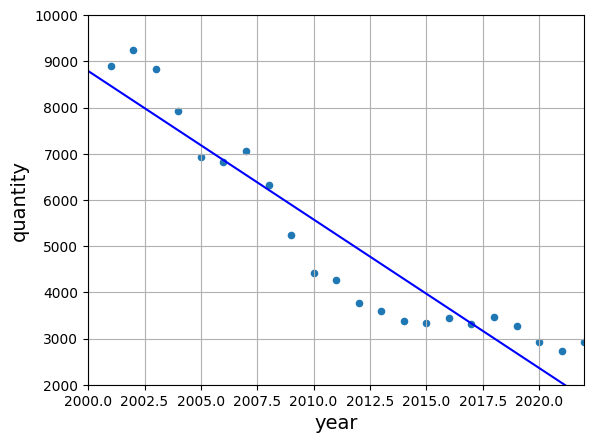

In [38]:
min_year = 2000
max_year = 2022
min_quantity = 2000
max_quantity = 10000



injuredorkilled.plot(kind='scatter', grid=True,
             x="year", y="quantity")



X_i_line = np.linspace(2000, 10000, 1000)
plt.plot(X_i_line, t_i_0 + t_i_1 * X_i_line, "b")

plt.axis([2000,2022,2000,10000])
plt.show()


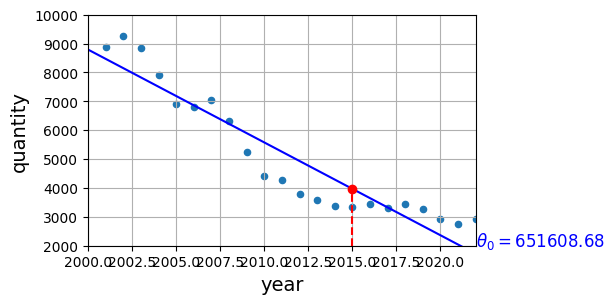

In [56]:
from sklearn import linear_model
#min_gd = 23_500
#max_gdp = 62_500
#min_life_sat = 4
#max_life_sat = 9

injuredorkilled.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x="year", y="quantity")

X_i_line = np.linspace(min_year, max_year)
plt.plot(X_i_line, t_i_0 + t_i_1 * X_i_line, "b")

plt.text(max_year, min_year,
         fr"$\theta_0 = {t_i_0:.2f}$", color="b")
#plt.text(max_quantity, min_quantity,
         #fr"$\theta_1 = {t_i_1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_year, max_year, min_quantity, max_quantity])

plt.plot([X_i_pred, X_i_pred],
         [min_quantity, y_i_pred], "r--")
plt.plot(X_i_pred, y_i_pred, "ro")

plt.show()

### Questions

1. How would you define Machine Learning?


Write your answer here

2. Can you name four types of problems where it shines?

Write your answer here

3. What is a labeled training set?

Write your answer here

4. What are the two most common supervised tasks?

Write your answer here

5. Can you name four common unsupervised tasks?

Write your answer here

6. What type of Machine Learning algorithm would you use to allow
a robot to walk in various unknown terrains?


Write your answer here

7. What type of algorithm would you use to segment your customers
into multiple groups?

Write your answer here

8. Would you frame the problem of spam detection as a supervised
learning problem or an unsupervised learning problem?

Write your answer here

9. What is an online learning system?


Write your answer here

10. What is out-of-core learning?

Write your answer here

11. What type of learning algorithm relies on a similarity measure to
make predictions?

Write your answer here

12. What is the difference between a model parameter and a learning
algorithm’s hyperparameter?

Write your answer here

13. What do model-based learning algorithms search for? What is the
most common strategy they use to succeed? How do they make
predictions?

Write your answer here

14. Can you name four of the main challenges in Machine Learning?

Write your answer here